<a href="https://colab.research.google.com/github/2023Datascienc/DAPLearning2025/blob/main/pandas_Demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install openpyxl

In [1]:
import pandas as pd

In [12]:
path_xlsx = "https://github.com/2023Datascienc/DAPLearning2025/raw/refs/heads/main/survivor.xlsx"

In [18]:
survivor_df = pd.ExcelFile(path_xlsx, engine='openpyxl')

In [19]:
survivor_df.sheet_names

['Description',
 'Data dictionary',
 'Castaway Details',
 'Castaways',
 'Vote History',
 'Jury Votes',
 'Hidden Idols',
 'Challenge Description',
 'Challenge Results',
 'Confessionals',
 'Season Palettes',
 'Tribe Colours',
 'Tribe Mapping',
 'Viewers',
 'Season Summary']

In [36]:
castaway_details = pd.read_excel(path_xlsx, sheet_name='Castaway Details')
castaway_details.columns

Index(['Castaway Id', 'Full Name', 'Short Name', 'Date of Birth',
       'Date of Death', 'Gender', 'Race', 'Ethnicity', 'Occupation',
       'Personality Type'],
      dtype='object')

In [37]:
castaways = pd.read_excel(path_xlsx, sheet_name='Castaways')
castaways.columns

Index(['Season Name', 'Season', 'Full Name', 'Castaway Id', 'Castaway', 'Age',
       'City', 'State', 'Personality Type', 'Episode', 'Day', 'Order',
       'Result', 'Jury Status', 'Original Tribe', 'Swapped Tribe',
       'Swapped Tribe 2', 'Merged Tribe', 'Total Votes Received',
       'Immunity Idols Won'],
      dtype='object')

In [38]:
vote_history = pd.read_excel(path_xlsx, sheet_name='Vote History')
vote_history.columns

Index(['Season Name', 'Season', 'Episode', 'Day', 'Tribe Status', 'Castaway',
       'Immunity', 'Vote', 'Nullified', 'Voted Out', 'Order', 'Vote Order',
       'Castaway Id', 'Vote Id', 'Voted Out Id'],
      dtype='object')

In [50]:
vote_history['Vote'].value_counts()

,count
Vote,
Keith,48
John,37
Joe,36
Andrea,36
Kelley,35
...,...
Colton,1
Eliminated,1
Do or Die,1


### Count the number of male and female castaways

In [35]:
castaway_details['Gender'].value_counts()

,count
Gender,
Male,305
Female,302
Non-binary,1


### Find the average age of all castaways

In [43]:
avg_age = castaways['Age'].mean()
avg_age

np.float64(33.41994750656168)

# How to merge data

In [44]:
merged_df = pd.merge(castaways, castaway_details, on='Castaway Id', how='left')


In [45]:
merged_df.head()

,Season Name,Season,Full Name_x,Castaway Id,Castaway,Age,City,State,Personality Type_x,Episode,...,Immunity Idols Won,Full Name_y,Short Name,Date of Birth,Date of Death,Gender,Race,Ethnicity,Occupation,Personality Type_y
0,Survivor: 41,41,Erika Casupanan,594,Erika,32,Toronta,Ontario,ENFP,13,...,8,Erika Casupanan,Erika,1989-07-20,NaT,Female,Asian,NaN,Communications Manager,ENFP
1,Survivor: 41,41,Deshawn Radden,601,Deshawn,26,Miami,Florida,ENTP,13,...,6,Deshawn Radden,Deshawn,1995-09-17,NaT,Male,Black,NaN,Medical Student,ENTP
2,Survivor: 41,41,Xander Hastings,597,Xander,20,Chicago,Illinois,INFJ,13,...,6,Xander Hastings,Xander,2000-08-11,NaT,Male,NaN,NaN,App Developer,INFJ
3,Survivor: 41,41,Heather Aldret,593,Heather,52,Charleston,South Carolina,ISFJ,13,...,6,Heather Aldret,Heather,1969-03-01,NaT,Female,NaN,NaN,Stay-at-home Mom,ISFJ
4,Survivor: 41,41,Ricard Foye,596,Ricard,31,Sedro-Woolley,Washington,ENTJ,13,...,5,Ricard Foye,Ricard,1989-12-04,NaT,Male,NaN,Hispanic or Latino,Flight Attendant,ENTJ


In [51]:
castaways[['Full Name', 'Age']]

,Full Name,Age
0,Erika Casupanan,32
1,Deshawn Radden,26
2,Xander Hastings,20
3,Heather Aldret,52
4,Ricard Foye,31
...,...,...
757,Dirk Been,23
758,Ramona Gray,29
759,Stacey Stillman,27
760,B.B. Andersen,64


### Find the name of the player with most **votes**


In [52]:
# First merge castaways and castaway details
merged_castaways = pd.merge(castaways, castaway_details, on='Castaway Id', how='left')

# Now merge the result with vote history
full_merged = pd.merge(merged_castaways, vote_history, on='Castaway Id', how='left')

# Show the first few rows
full_merged.head()



,Season Name_x,Season_x,Full Name_x,Castaway Id,Castaway_x,Age,City,State,Personality Type_x,Episode_x,...,Tribe Status,Castaway_y,Immunity,Vote,Nullified,Voted Out,Order_y,Vote Order,Vote Id,Voted Out Id
0,Survivor: 41,41,Erika Casupanan,594,Erika,32,Toronta,Ontario,ENFP,13,...,Merged,Erika,Individual,Sydney,False,Sydney,7.0,1.0,605.0,605.0
1,Survivor: 41,41,Erika Casupanan,594,Erika,32,Toronta,Ontario,ENFP,13,...,Merged,Erika,NaN,Tiffany,False,Tiffany,8.0,1.0,604.0,604.0
2,Survivor: 41,41,Erika Casupanan,594,Erika,32,Toronta,Ontario,ENFP,13,...,Merged,Erika,Individual,Naseer,False,Tie,9.0,1.0,600.0,NaN
3,Survivor: 41,41,Erika Casupanan,594,Erika,32,Toronta,Ontario,ENFP,13,...,Merged,Erika,Individual,Naseer,False,Naseer,9.0,2.0,600.0,600.0
4,Survivor: 41,41,Erika Casupanan,594,Erika,32,Toronta,Ontario,ENFP,13,...,Merged,Erika,NaN,Shan,False,Tie,11.0,1.0,606.0,NaN


In [61]:
full_merged['Vote'].value_counts().sort_values(ascending=False)

,count
Vote,
Keith,85
Sierra,78
Ciera,72
Andrea,71
Jeff,69
...,...
Earl,1
Do or Die,1
Chase,1


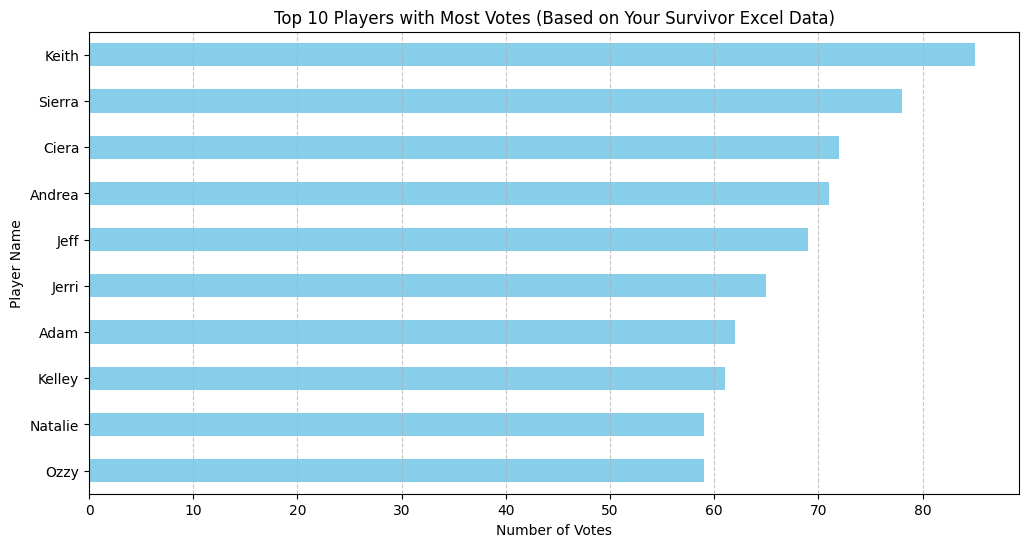

In [60]:
import matplotlib.pyplot as plt

# First, re-merge everything (since previous state got reset)
merged_castaways = pd.merge(castaways, castaway_details, on='Castaway Id', how='left')
full_merged = pd.merge(merged_castaways, vote_history, on='Castaway Id', how='left')

# Now, count votes
votes_received = full_merged['Vote'].value_counts()

# Get top 10 most voted players
top_10_votes = votes_received.head(10)

# Plot
plt.figure(figsize=(12,6))
top_10_votes.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Votes')
plt.ylabel('Player Name')
plt.title('Top 10 Players with Most Votes (Based on Your Survivor Excel Data)')
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [67]:
castaways

,Season Name,Season,Full Name,Castaway Id,Castaway,Age,City,State,Personality Type,Episode,Day,Order,Result,Jury Status,Original Tribe,Swapped Tribe,Swapped Tribe 2,Merged Tribe,Total Votes Received,Immunity Idols Won
0,Survivor: 41,41,Erika Casupanan,594,Erika,32,Toronta,Ontario,ENFP,13,26,18,Sole Survivor,NaN,Luvu,NaN,NaN,Via Kana,2,8
1,Survivor: 41,41,Deshawn Radden,601,Deshawn,26,Miami,Florida,ENTP,13,26,17,Runner-up,NaN,Luvu,NaN,NaN,Via Kana,7,6
2,Survivor: 41,41,Xander Hastings,597,Xander,20,Chicago,Illinois,INFJ,13,26,16,2nd runner-up,NaN,Yase,NaN,NaN,Via Kana,2,6
3,Survivor: 41,41,Heather Aldret,593,Heather,52,Charleston,South Carolina,ISFJ,13,25,15,15th voted out,8th jury member,Luvu,NaN,NaN,Via Kana,4,6
4,Survivor: 41,41,Ricard Foye,596,Ricard,31,Sedro-Woolley,Washington,ENTJ,13,24,14,14th voted out,7th jury member,Ua,NaN,NaN,Via Kana,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,Survivor: Borneo,1,Dirk Been,5,Dirk,23,Spring Green,Wisconsin,ISFP,5,15,5,5th voted out,NaN,Tagi,NaN,NaN,NaN,4,2
758,Survivor: Borneo,1,Ramona Gray,4,Ramona,29,Edison,New Jersey,ISTJ,4,12,4,4th voted out,NaN,Pagong,NaN,NaN,NaN,6,2
759,Survivor: Borneo,1,Stacey Stillman,3,Stacey,27,San Francisco,California,ENTJ,3,9,3,3rd voted out,NaN,Tagi,NaN,NaN,NaN,6,1
760,Survivor: Borneo,1,B.B. Andersen,2,B.B.,64,Mission Hills,Kansas,ESTJ,2,6,2,2nd voted out,NaN,Pagong,NaN,NaN,NaN,6,1


### Which player received the Most "Total Votes Received"

In [70]:
castaways[['Full Name', 'Total Votes Received']].value_counts().sort_values(ascending=False)

,,count
Full Name,Total Votes Received,
Oscar Lusth,17,3
Cirie Fields,3,3
Burton Roberts,10,2
Gervase Peterson,6,2
Lillian Morris,10,2
...,...,...
Tony Vlachos,7,1
Tracy Hughes-Wolf,7,1
Travis Sampson,6,1


In [82]:
player_id = full_merged[['Full Name_x','Immunity Idols Won']].sort_values(by = 'Immunity Idols Won', ascending=False).index[0]

In [85]:
player_id_2 = full_merged[['Full Name_x','Immunity Idols Won']].sort_values(by = 'Immunity Idols Won', ascending=False)

In [88]:
player_id_2.head(1)

,Full Name_x,Immunity Idols Won
6308,Tom Westman,12


In [84]:
full_merged.iloc[player_id]

,6308
Season Name_x,Survivor: Palau
Season_x,10
Full Name_x,Tom Westman
Castaway Id,150
Castaway_x,Tom
Age,40
City,Sayville
State,New York
Personality Type_x,ESTJ
Episode_x,15


In [83]:
full_merged.loc[player_id, 'Full Name_x']

'Tom Westman'